In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'Income($)')

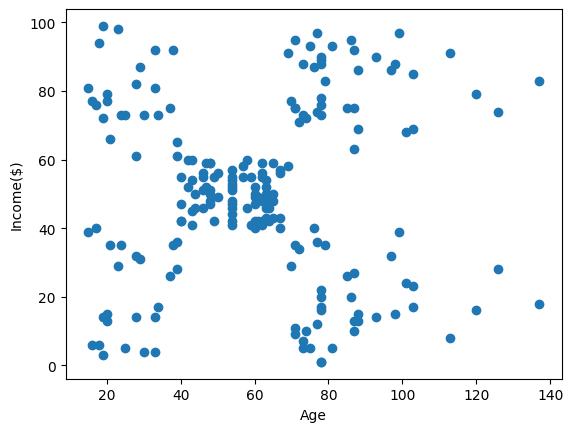

In [7]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [40]:
df["A"] = df[["Annual Income (k$)"]]
df["B"] = df[["Spending Score (1-100)"]]

In [42]:
X = df[["A","B"]]
X.head()

,A,B
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [43]:
Kmean = KMeans(n_clusters = 5)
Kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [44]:
centers = Kmean.cluster_centers_
print(centers)

[[0.6        0.16443149]
 [0.08792846 0.79962894]
 [0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.09265859 0.20319432]]


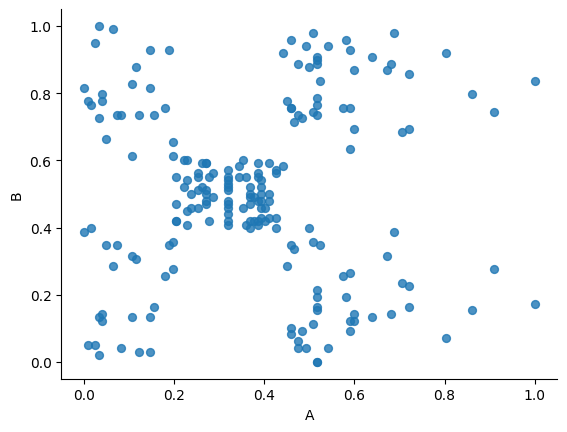

In [46]:
X.plot(kind='scatter', x='A', y='B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
clusters = Kmean.fit_predict(X)
df["label"] = clusters
df.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,label,A,B
0,1,Male,19,0.000000,0.387755,2,2,0.000000,0.387755
1,2,Male,21,0.000000,0.816327,2,4,0.000000,0.816327
2,3,Female,20,0.008197,0.051020,0,2,0.008197,0.051020
3,4,Female,23,0.008197,0.775510,2,4,0.008197,0.775510
4,5,Female,31,0.016393,0.397959,2,2,0.016393,0.397959
...,...,...,...,...,...,...,...,...,...
95,96,Male,24,0.368852,0.520408,2,1,0.368852,0.520408
96,97,Female,47,0.368852,0.469388,2,1,0.368852,0.469388
97,98,Female,27,0.368852,0.500000,2,1,0.368852,0.500000
98,99,Male,48,0.377049,0.418367,2,1,0.377049,0.418367


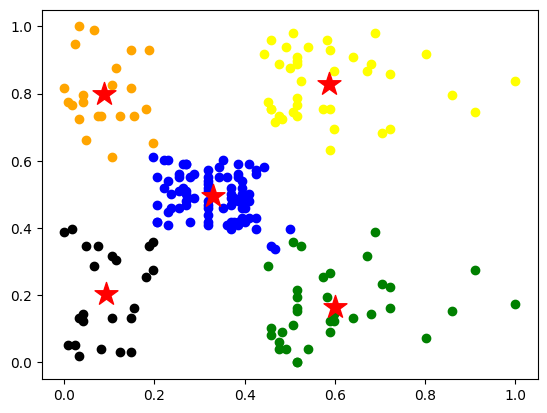

In [50]:
col = ['green', 'blue', 'black', 'yellow', 'orange']

for i in range(5):
  a = col[i]
  plt.scatter(df.A[df.label == i], df.B[df.label == i], c = a, label = 'cluser 1')
plt.scatter(centers[:, 0], centers[:, 1], marker = '*', s = 300, c = 'r', label = 'centroid')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

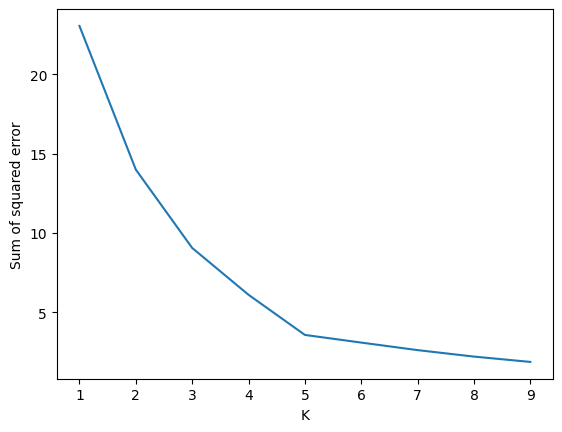

In [52]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [16]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,0


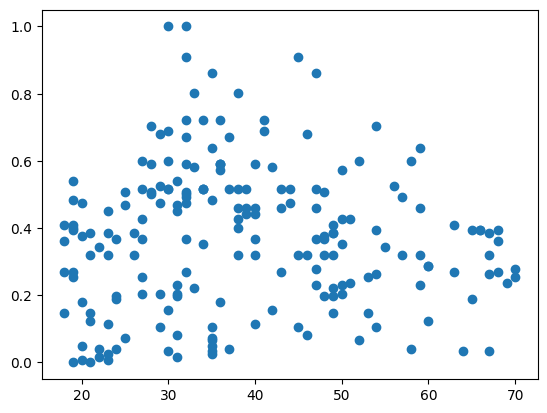

In [18]:
plt.scatter(df.Age,df['Annual Income (k$)'])

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [21]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,2


In [22]:
km.cluster_centers_

array([[0.46737705, 0.1577551 ],
       [0.58638083, 0.82783883],
       [0.25631369, 0.5426549 ]])

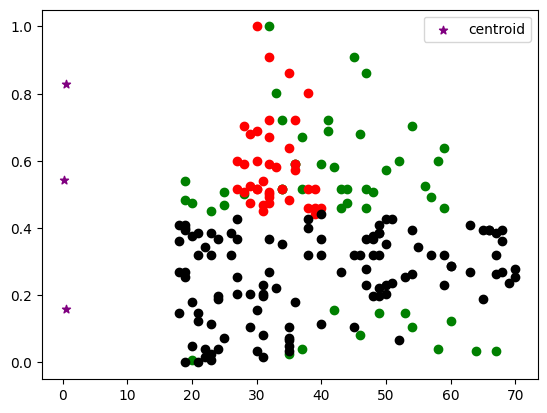

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [26]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

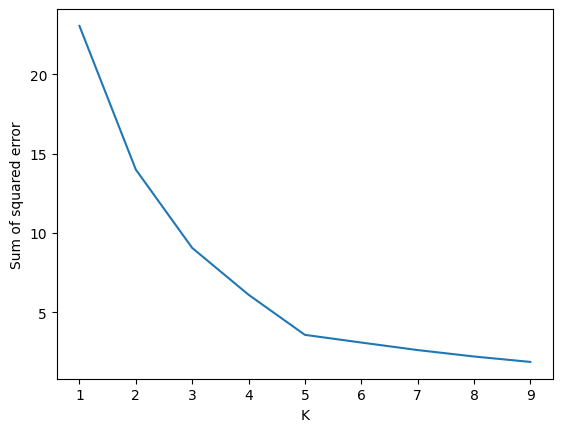

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)